<a href="https://colab.research.google.com/github/DaryaPodakova/DaryaPodakova/blob/main/retention_plot%3Dtest_for__NextRP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 по внешним ссылкам - парсилось в HTML-формате,
 поэтому для быстроты решения скопировала ярлыки файлов к себе в директорию.
#  

In [15]:
installs=pd.read_csv('/content/drive/MyDrive/портфолио/NXRP/installs.csv',sep=',', 
                     header=None,names=['client_id', 'install_timestamp'],parse_dates=['install_timestamp'])
logins=pd.read_csv('/content/drive/MyDrive/портфолио/NXRP/logins.csv',sep=',',
                   header=None,names=['client_id', 'event_timestamp'],parse_dates=['event_timestamp'])

In [16]:
# создаю функцию для полной проверки данных
def describing(x):
    divider = "---"
    
    print("Строк: {},колонок: {}".format(x.shape[0],x.shape[1])) 
    print("\n {} \n".format((divider*30)))
    print("Типы колонок \n\n", (x.dtypes))
    print("\n {} \n".format((divider*30)))
    print("Описание данных \n\n", x.describe().round(2))
    print("\n {} \n".format((divider*30)))
    print("Проверка на пропуски \n\n",x.isna().sum())
    print("\n {} \n".format((divider*30)))
    return

In [17]:
#  описываем данные, видим, что пропусков нет,дата нормально распозналась
#  и можно передать данные в столбик "даты" без времени
describing(installs)

Строк: 2659,колонок: 2

 ------------------------------------------------------------------------------------------ 

Типы колонок 

 client_id                    object
install_timestamp    datetime64[ns]
dtype: object

 ------------------------------------------------------------------------------------------ 

Описание данных 

                                    client_id    install_timestamp
count                                   2659                 2659
unique                                  2659                 2642
top     d31da2f8-72c3-4d30-b0c2-541ad9359162  2019-11-23 10:43:20
freq                                       1                    2
first                                    NaN  2019-11-19 11:18:14
last                                     NaN  2020-08-17 19:43:42

 ------------------------------------------------------------------------------------------ 

Проверка на пропуски 

 client_id            0
install_timestamp    0
dtype: int64

 ------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  if __name__ == '__main__':


In [18]:
describing(logins)

Строк: 299540,колонок: 2

 ------------------------------------------------------------------------------------------ 

Типы колонок 

 client_id                  object
event_timestamp    datetime64[ns]
dtype: object

 ------------------------------------------------------------------------------------------ 

Описание данных 

                                    client_id      event_timestamp
count                                 299540               299540
unique                                  2659               298000
top     b83797ae-aef1-462e-9c63-cf2d2e983be8  2020-06-05 12:38:18
freq                                    4073                    3
first                                    NaN  2020-02-01 00:23:36
last                                     NaN  2021-08-26 23:57:12

 ------------------------------------------------------------------------------------------ 

Проверка на пропуски 

 client_id          0
event_timestamp    0
dtype: int64

 ------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  if __name__ == '__main__':


In [28]:
#добавляем колонку времени к логинам и инсталлам
logins['data']=logins.event_timestamp.dt.date


In [29]:
full_data=installs.merge(logins,on='client_id',how='inner')

In [21]:
full_data.dtypes

client_id                    object
install_timestamp    datetime64[ns]
event_timestamp      datetime64[ns]
data                         object
dtype: object

In [22]:
full_data.head()

,client_id,install_timestamp,event_timestamp,data
0,f346a7e1-ce78-475e-8bd2-6801843b0755,2020-08-17 16:04:54,2020-08-17 16:17:39,2020-08-17
1,f346a7e1-ce78-475e-8bd2-6801843b0755,2020-08-17 16:04:54,2020-08-17 16:04:54,2020-08-17
2,f346a7e1-ce78-475e-8bd2-6801843b0755,2020-08-17 16:04:54,2020-08-17 16:15:25,2020-08-17
3,f346a7e1-ce78-475e-8bd2-6801843b0755,2020-08-17 16:04:54,2020-08-17 16:20:07,2020-08-17
4,390a30f3-d39b-41f3-9d1d-fc0e75567fdc,2020-08-17 16:05:19,2020-08-17 16:05:19,2020-08-17


In [23]:
# для каждого клиента ищем, когда он зашел в приложение по дням. 
#Правильнее было бы вычесть из последней даты захода в приложение -дату регистрации, 
#это будут секунды и перевести в часы, потом отсекать у кого больше 24ых. Но у меня "мастерства" хватило только на разницу дат
prepare_data=full_data \
.groupby(['client_id','data'],as_index=False)\
.min() \
.reset_index()\
.rename(columns={"event_timestamp":"start"})
prepare_data

,index,client_id,data,install_timestamp,start
0,0,00148040-841d-4250-b6fc-f20b3bb997e1,2021-08-22,2019-11-20 14:26:24,2021-08-22 03:07:44
1,1,00151121-ced6-4a5e-a714-29a9a338c6eb,2020-08-17,2020-08-17 16:22:33,2020-08-17 16:22:33
2,2,002cbdcf-fccb-47e7-a7cc-034060011387,2020-02-11,2019-11-23 15:50:26,2020-02-11 12:17:37
3,3,002cbdcf-fccb-47e7-a7cc-034060011387,2020-05-02,2019-11-23 15:50:26,2020-05-02 12:49:54
4,4,002cbdcf-fccb-47e7-a7cc-034060011387,2020-05-15,2019-11-23 15:50:26,2020-05-15 19:54:03
...,...,...,...,...,...
75604,75604,ffe7af47-6507-4040-880b-22c3db478373,2020-04-28,2019-11-23 10:37:40,2020-04-28 07:37:49
75605,75605,ffe7af47-6507-4040-880b-22c3db478373,2020-04-29,2019-11-23 10:37:40,2020-04-29 15:20:17
75606,75606,ffe7af47-6507-4040-880b-22c3db478373,2020-05-01,2019-11-23 10:37:40,2020-05-01 15:28:17
75607,75607,ffe7af47-6507-4040-880b-22c3db478373,2020-12-07,2019-11-23 10:37:40,2020-12-07 08:52:39


In [24]:
# считаем дни с начала старта активности логов и вычитаем дату регистрации
prepare_data['days_since_start'] = (prepare_data['start'] - prepare_data['install_timestamp']).dt.days
prepare_data.head()


,index,client_id,data,install_timestamp,start,days_since_start
0,0,00148040-841d-4250-b6fc-f20b3bb997e1,2021-08-22,2019-11-20 14:26:24,2021-08-22 03:07:44,640
1,1,00151121-ced6-4a5e-a714-29a9a338c6eb,2020-08-17,2020-08-17 16:22:33,2020-08-17 16:22:33,0
2,2,002cbdcf-fccb-47e7-a7cc-034060011387,2020-02-11,2019-11-23 15:50:26,2020-02-11 12:17:37,79
3,3,002cbdcf-fccb-47e7-a7cc-034060011387,2020-05-02,2019-11-23 15:50:26,2020-05-02 12:49:54,160
4,4,002cbdcf-fccb-47e7-a7cc-034060011387,2020-05-15,2019-11-23 15:50:26,2020-05-15 19:54:03,174


In [25]:
#оставляем 7 дневный ретеншион для графика
retention=prepare_data.query('days_since_start<7')

In [26]:
# смотрим в ретеншион 1 дня = 28,8%

retention.groupby(['days_since_start'])['client_id'].nunique() / retention['client_id'].nunique()*100


days_since_start
0    100.000000
1     28.813559
2     20.338983
3     16.464891
4     11.138015
5     10.895884
6      8.958838
Name: client_id, dtype: float64

(0.0, 1.05)

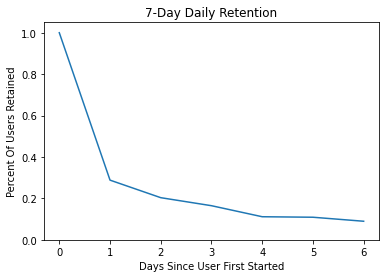

In [27]:
# визуализация
whole_retention = retention.groupby(['days_since_start'])['client_id'].nunique() / retention['client_id'].nunique()

plt.plot(whole_retention)
plt.title("7-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0,1.05)

